In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv('C:/Users/boyerm/Documents/Thinkful/Most-Recent-Cohorts-All-Data-Elements.csv')

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,9,1170,1171,1172,1173,1174,1175,1177,1178,1179,1181,1183,1184,1185,1186,1187,1188,1190,1192,1196,1198,1199,1200,1201,1209,1211,1212,1213,1214,1222,1223,1224,1225,1226,1227,1235,1236,1237,1238,1239,1240,1248,1249,1251,1252,1253,1257,1261,1262,1264,1265,1266,1270,1274,1275,1276,1277,1278,1279,1282,1283,1287,1288,1289,1290,1291,1292,1295,1296,1309,1322,1326,1327,1328,1329,1330,1331,1333,1334,1335,1339,1340,1341,1342,1343,1344,1346,1347,1348,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1411,1425,1427,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1517,1529,1530,1532,1537,1540,1541,1542,1546,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1

In [3]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,NaN,0.0000,1044.0,NaN,NaN,1,0.4831,0.5169,1895.0,1574.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,NaN,0.2408,1246.0,NaN,NaN,1,0.4169,0.5831,3937.0,3481.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,0.0000,9.0,NaN,NaN,1,0.3986,0.6014,344.0,336.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,0.3477,765.0,NaN,NaN,1,0.5733,0.4267,1513.0,1392.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,0.0000,1330.0,NaN,NaN,1,0.3877,0.6123,2137.0,1961.0


In [4]:
df.shape

(7703, 1743)

In [5]:
colleges = df.query('PREDDEG == 3')  # predominantly bachelors

In [6]:
colleges.shape

(2102, 1743)

In [7]:
colleges2 = colleges[['HCM2','MAIN','NUMBRANCH','HIGHDEG','CONTROL','ST_FIPS',
                      'REGION','LOCALE','CCBASIC','CCUGPROF','CCSIZSET','HBCU','PBI','ANNHI','TRIBAL','AANAPII',
                      'HSI','NANTI','MENONLY','WOMENONLY', 'RELAFFIL','ADM_RATE','ACTCMMID', 'SAT_AVG','PCIP01','PCIP03','PCIP04','PCIP05','PCIP09','PCIP10', 'PCIP11',
                      'PCIP12','PCIP13','PCIP14','PCIP15','PCIP16','PCIP19','PCIP22','PCIP23','PCIP24','PCIP25','PCIP26',
                      'PCIP27','PCIP29','PCIP30','PCIP31','PCIP38','PCIP39','PCIP40','PCIP41','PCIP42','PCIP43','PCIP44',
                      'PCIP45','PCIP46', 'PCIP47','PCIP48','PCIP49','PCIP50','PCIP51','PCIP52','PCIP54', 'DISTANCEONLY',
                    'UGDS',	'UG','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI',
                    'UGDS_2MOR','UGDS_NRA',	'UGDS_UNKN','UGDS_WHITENH',	'UGDS_BLACKNH',	'UGDS_API',	'UGDS_AIANOLD',	'UGDS_HISPOLD',
                    'UG_NRA','UG_UNKN',	'UG_WHITENH',	'UG_BLACKNH',	'UG_API',	'UG_AIANOLD',	'UG_HISPOLD',	'PPTUG_EF',
                    'PPTUG_EF2',	'CURROPER',	'COSTT4_A',	'TUITIONFEE_IN','TUITIONFEE_OUT','TUITFTE','INEXPFTE','PFTFAC',	'PCTPELL',	
                      'C150_4',	'C150_4_POOLED','POOLYRS',	'PFTFTUG1_EF',	'D150_4',	'D150_4_POOLED',
                    'C150_4_WHITE',	'C150_4_BLACK',	'C150_4_HISP',	'C150_4_ASIAN',	'C150_4_AIAN',	'C150_4_NHPI',	'C150_4_2MOR',
                    'C150_4_NRA',	'C150_4_UNKN',	'C150_4_WHITENH',	'C150_4_BLACKNH',	'C150_4_API',	'C150_4_AIANOLD',	'C150_4_HISPOLD',
                    'RET_FT4',	'RET_FTL4',	'RET_PT4',	'RET_PTL4',	'PCTFLOAN',	'UG25ABV',	'CDR2',	'CDR3',	'INC_PCT_LO',	'DEP_STAT_PCT_IND',
                    'DEP_INC_PCT_LO',	'IND_INC_PCT_LO','PAR_ED_PCT_1STGEN','INC_PCT_M1','INC_PCT_M2',	'INC_PCT_H1','INC_PCT_H2',
                    'DEP_INC_PCT_M1',	'DEP_INC_PCT_M2','DEP_INC_PCT_H1','DEP_INC_PCT_H2','IND_INC_PCT_M1',	'IND_INC_PCT_M2',
                    'IND_INC_PCT_H1',	'IND_INC_PCT_H2','PAR_ED_PCT_MS','PAR_ED_PCT_HS','PAR_ED_PCT_PS',	'APPL_SCH_PCT_GE2',
                    'APPL_SCH_PCT_GE3',	'APPL_SCH_PCT_GE4',	'APPL_SCH_PCT_GE5',	'DEP_INC_AVG',	'IND_INC_AVG',	'DEBT_MDN',	'GRAD_DEBT_MDN',
                    'WDRAW_DEBT_MDN',	'LO_INC_DEBT_MDN',	'MD_INC_DEBT_MDN',	'HI_INC_DEBT_MDN',	'DEP_DEBT_MDN',	'IND_DEBT_MDN',
                    'PELL_DEBT_MDN',	'NOPELL_DEBT_MDN',	'FEMALE_DEBT_MDN',	'MALE_DEBT_MDN',	'FIRSTGEN_DEBT_MDN','NOTFIRSTGEN_DEBT_MDN',
                    'DEBT_N','GRAD_DEBT_MDN10YR',	'CUML_DEBT_N',	'CUML_DEBT_P90',	'CUML_DEBT_P75',	'CUML_DEBT_P25',	'CUML_DEBT_P10',
                    'INC_N',	'DEP_INC_N',	'IND_INC_N',	'DEP_STAT_N',	'PAR_ED_N',	'APPL_SCH_N',	'COUNT_ED',	'LOAN_EVER',
                    'PELL_EVER',	'AGE_ENTRY','AGEGE24',	'FEMALE',	'MARRIED',	'DEPENDENT','VETERAN',	'FIRST_GEN',
                    'FAMINC',	'MD_FAMINC',	'FAMINC_IND','PCT_WHITE',	'PCT_BLACK',	'PCT_ASIAN',
                    'PCT_HISPANIC',	'PCT_BA',	'PCT_GRAD_PROF',	'PCT_BORN_US',	'MEDIAN_HH_INC','POVERTY_RATE',	'UNEMP_RATE',	
                    'LN_MEDIAN_HH_INC','UGDS_MEN',
                     
                     'NPT4_PUB','NPT4_PRIV','NUM4_PUB','NUM4_PRIV','MN_EARN_WNE_P10'                     ]]
#'AVGFACSAL'
#'SATVR25','SATVR75', 'SATMT25','SATMT75','SATWR25','SATWR75','SATVRMID','SATMTMID','SATWRMID','ACTCM25','ACTCM75','ACTEN25','ACTEN75','ACTMT25','ACTMT75','ACTWR25','ACTWR75'
# 'ACTENMID','ACTMTMID','ACTWRMID'
#	'GRAD_DEBT_N',	'WDRAW_DEBT_N',	'LO_INC_DEBT_N',	'MD_INC_DEBT_N','HI_INC_DEBT_N','DEP_DEBT_N','IND_DEBT_N', 'PELL_DEBT_N',	'NOPELL_DEBT_N',	'FEMALE_DEBT_N',	'MALE_DEBT_N',	'FIRSTGEN_DEBT_N',	'NOTFIRSTGEN_DEBT_N',

In [8]:

colleges2['NPT4_PUB_OR_PRIV'] = colleges2[['NPT4_PUB','NPT4_PRIV']].max(axis=1)

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
colleges2 = colleges2.drop(['NPT4_PUB','NPT4_PRIV'],axis = 1)

In [10]:
colleges2['NUM4_PUB_OR_PRIV'] = colleges2[['NUM4_PUB','NUM4_PRIV']].max(axis=1)

In [11]:
colleges2 = colleges2.drop(['NUM4_PUB','NUM4_PRIV'],axis = 1)

In [12]:
colleges2 = colleges2.replace({'PrivacySuppressed': 0}, regex=True)
colleges2 = colleges2.replace({'NULL': 0}, regex=True)
colleges2 = colleges2.fillna(0) 

In [13]:
colleges2 = colleges2.apply(pd.to_numeric)

In [14]:
colleges2.dtypes

HCM2                  int64
MAIN                  int64
NUMBRANCH             int64
HIGHDEG               int64
CONTROL               int64
ST_FIPS               int64
REGION                int64
LOCALE              float64
CCBASIC             float64
CCUGPROF            float64
CCSIZSET            float64
HBCU                float64
PBI                 float64
ANNHI               float64
TRIBAL              float64
AANAPII             float64
HSI                 float64
NANTI               float64
MENONLY             float64
WOMENONLY           float64
RELAFFIL            float64
ADM_RATE            float64
ACTCMMID            float64
SAT_AVG             float64
PCIP01              float64
PCIP03              float64
PCIP04              float64
PCIP05              float64
PCIP09              float64
PCIP10              float64
                     ...   
PAR_ED_N              int64
APPL_SCH_N            int64
COUNT_ED            float64
LOAN_EVER           float64
PELL_EVER           

In [15]:
colleges2.shape

(2102, 205)

In [16]:
colleges2 = colleges2.query('MN_EARN_WNE_P10 > 0')

In [17]:
colleges2.shape

(1843, 205)

# visualizations

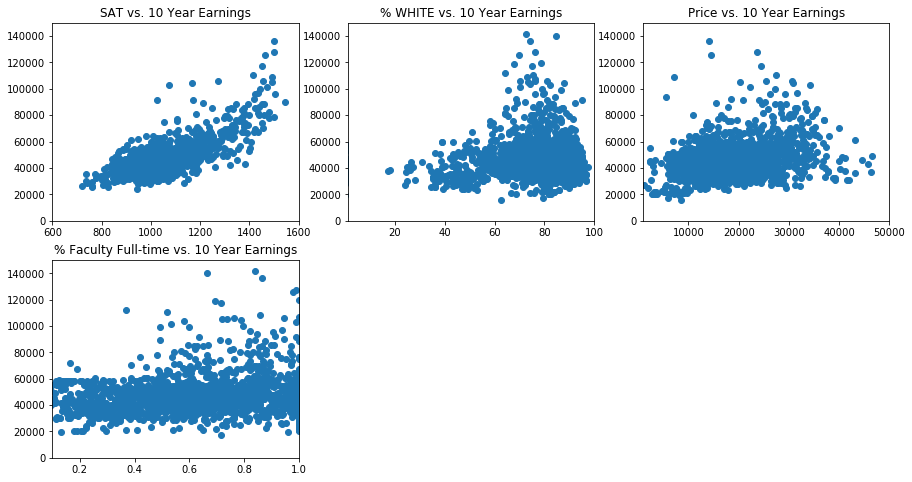

In [18]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.scatter(colleges2.SAT_AVG,colleges2.MN_EARN_WNE_P10)
plt.xlim(600,1600)
plt.ylim(0,150000)
plt.title("SAT vs. 10 Year Earnings")

plt.subplot(2, 3, 2)
plt.scatter(colleges2.PCT_WHITE,colleges2.MN_EARN_WNE_P10)
plt.xlim(1,100)
plt.ylim(0,150000)
plt.title("% WHITE vs. 10 Year Earnings")

plt.subplot(2, 3, 3)
plt.scatter(colleges2.NPT4_PUB_OR_PRIV,colleges2.MN_EARN_WNE_P10)
plt.xlim(1000,50000)
plt.ylim(0,150000)
plt.title("Price vs. 10 Year Earnings")

plt.subplot(2, 3, 4)
plt.scatter(colleges2.PFTFAC,colleges2.MN_EARN_WNE_P10)
plt.xlim(0.1,1.00)
plt.ylim(0,150000)
plt.title("% Faculty Full-time vs. 10 Year Earnings")
plt.show()

In [19]:
X = colleges2.drop('MN_EARN_WNE_P10',axis = 1)
Y = colleges2.MN_EARN_WNE_P10

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

# Split the data 
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,
    test_size=0.5,
    random_state=None)

scaler = StandardScaler()  

scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [21]:
mlp = MLPRegressor(hidden_layer_sizes=(40,40,40,40 ))

In [22]:
mlp.fit(X_train, Y_train)

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 40, 40, 40), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [23]:
mlp.score(X_train, Y_train)

0.85104090516090858

In [24]:
y_pred = mlp.predict(X_test)

0.371311217007


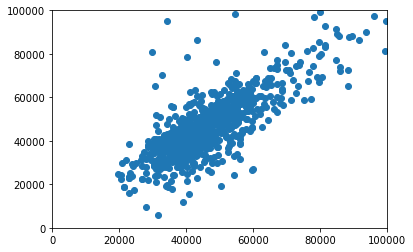

In [25]:
plt.scatter(Y_test,y_pred)
plt.xlim(0,100000)
plt.ylim(0,100000);
print(mlp.score(X_test, Y_test))

# Random Forest

In [26]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfr = ensemble.RandomForestRegressor()
rfr.fit(X_train, Y_train)
print(cross_val_score(rfr, X_train, Y_train, cv=5))
print(rfr.score(X_train, Y_train))

[ 0.64986943  0.73757911  0.66655964  0.4489035   0.72243809]
0.940581262587


In [27]:
cross_val_score(rfr, X_test, Y_test, cv=5)

array([ 0.60846279,  0.67809764,  0.50810236,  0.68071854,  0.71347668])

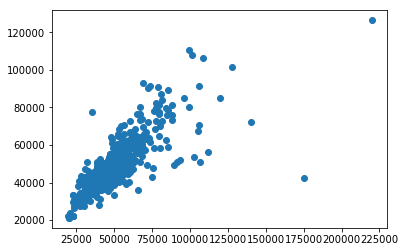

In [28]:
y_pred = rfr.predict(X_test)
plt.scatter(Y_test,y_pred);

In [29]:
rfr.score(X_test, Y_test)

0.63821570348344703

In [30]:
importances = rfr.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
#indices = np.argsort(importances)[-20:]
# Print the feature ranking
print("Feature ranking:")
g = 1
for f in range(X.shape[1]):
    if importances[indices[f]] > 0.01:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        g += 1
    else:
        continue
print(g)

Feature ranking:
1. feature 93 (0.218233)
2. feature 23 (0.145224)
3. feature 95 (0.080213)
4. feature 9 (0.073157)
5. feature 68 (0.025887)
6. feature 123 (0.022182)
7. feature 148 (0.021972)
8. feature 159 (0.018444)
9. feature 21 (0.016358)
10. feature 131 (0.015406)
11. feature 33 (0.012988)
12. feature 81 (0.012770)
13. feature 125 (0.012252)
14. feature 58 (0.012003)
15. feature 122 (0.010930)
16. feature 140 (0.010122)
17


In [31]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(colleges2.columns, rfr.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort(['Gini-importance'], ascending=[0])

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [32]:
imp = importances[:10]
print(imp)

                 Gini-importance
INEXPFTE                0.218233
SAT_AVG                 0.145224
PCTPELL                 0.080213
CCUGPROF                0.073157
UGDS_ASIAN              0.025887
CDR3                    0.022182
DEP_INC_AVG             0.021972
NOPELL_DEBT_MDN         0.018444
ADM_RATE                0.016358
INC_PCT_H1              0.015406


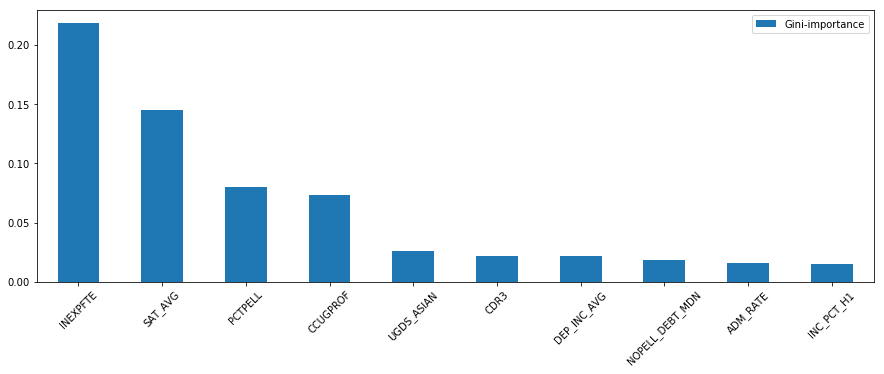

In [33]:

imp.sort_values(by='Gini-importance', ascending= False).plot(kind='bar', rot=45,figsize=(15, 5));

Random Forest performs better and is less complex. It could be caused by the fact that there is not enough data for the MLP to perform as well.